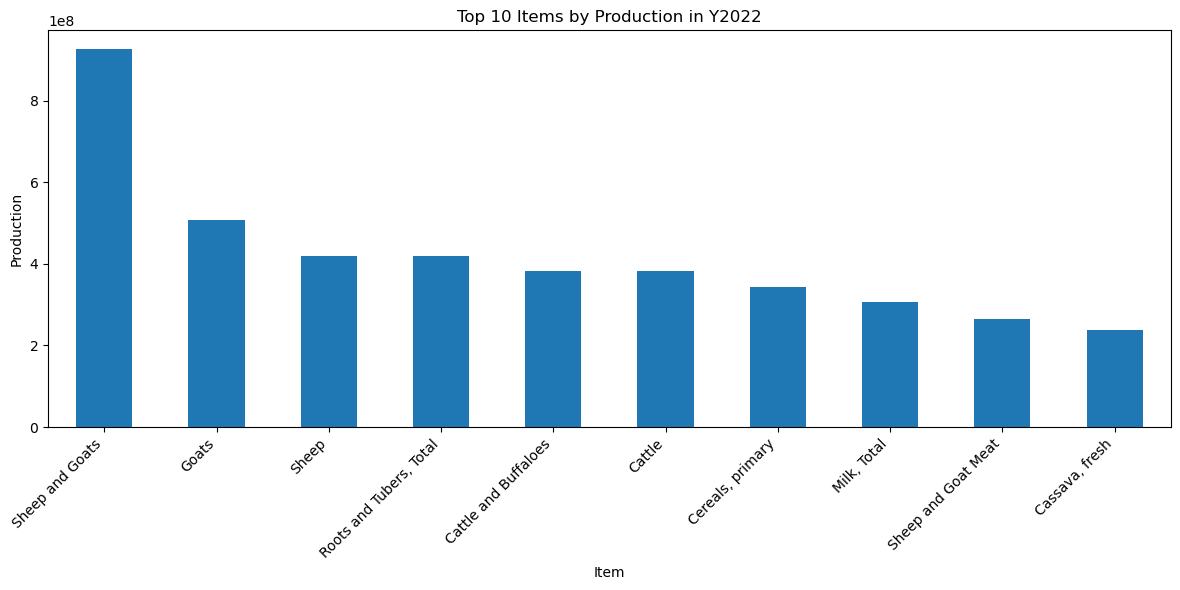

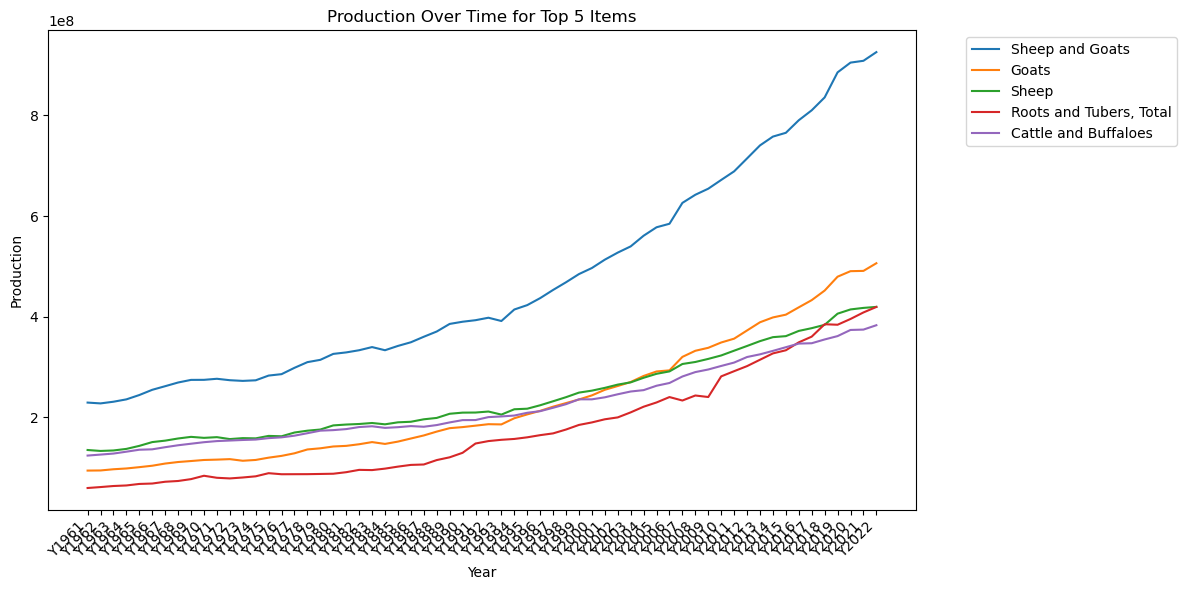

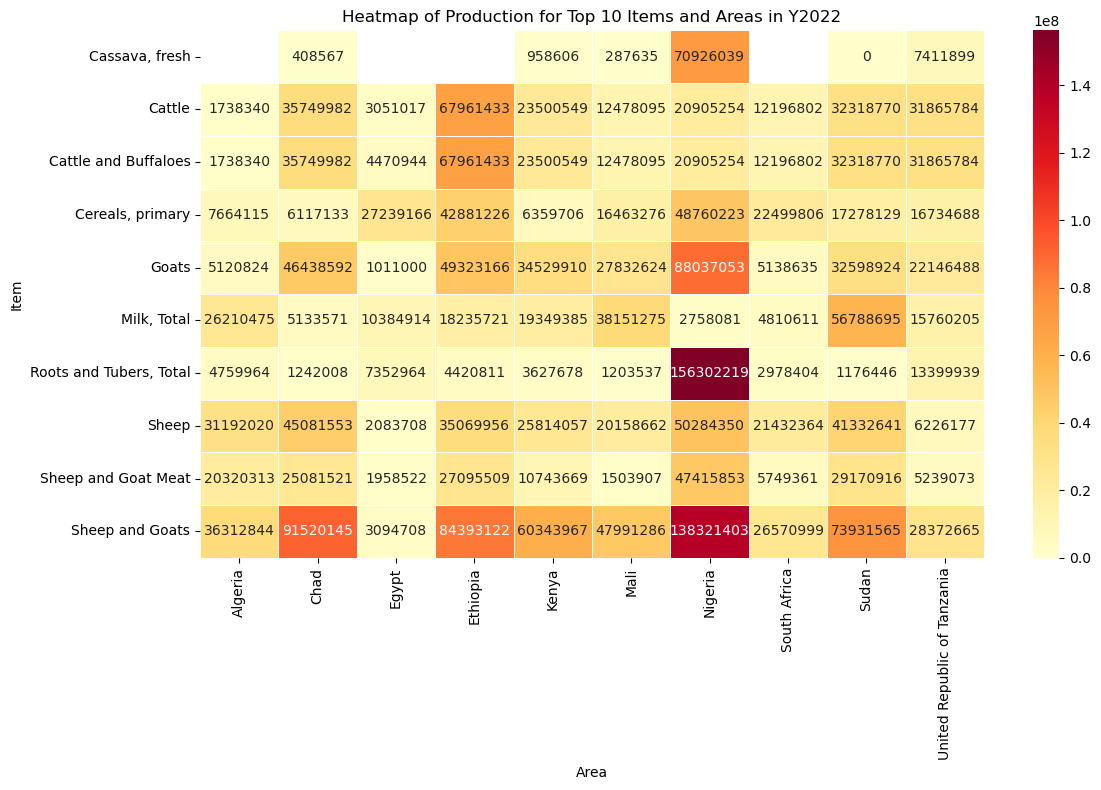

<Figure size 1200x600 with 0 Axes>

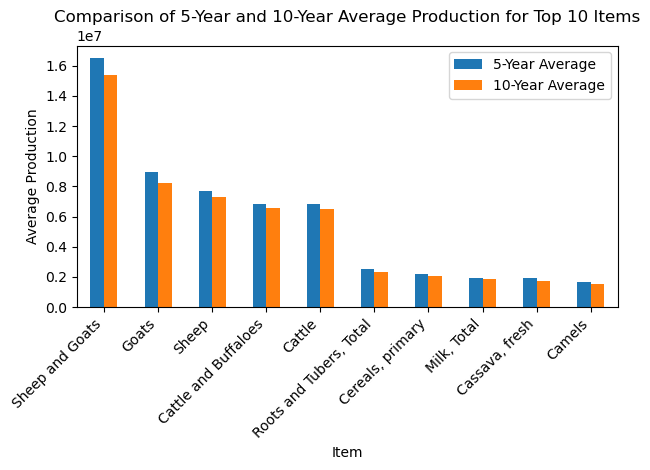

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Production_Crops_Livestock_E_Africa.csv', encoding='ISO-8859-1')

# 1. Bar plot of top 10 items by production in the most recent year
recent_year = df.filter(regex='^Y\d{4}$').columns[-1]
top_items = df.groupby('Item')[recent_year].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_items.plot(kind='bar')
plt.title(f'Top 10 Items by Production in {recent_year}')
plt.xlabel('Item')
plt.ylabel('Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Line plot of total production over time for top 5 items
top_5_items = top_items.head().index.tolist()
year_columns = df.filter(regex='^Y\d{4}$').columns
production_over_time = df[df['Item'].isin(top_5_items)].groupby('Item')[year_columns].sum()

plt.figure(figsize=(12, 6))
for item in top_5_items:
    plt.plot(year_columns, production_over_time.loc[item], label=item)
plt.title('Production Over Time for Top 5 Items')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Heatmap of production for top 10 items and top 10 areas
# Aggregate the data to ensure unique index values before pivoting
# We will sum the production values for each combination of Item and Area
top_10_areas = df.groupby('Area')[recent_year].sum().nlargest(10).index
aggregated_data = df[(df['Item'].isin(top_items.index)) & (df['Area'].isin(top_10_areas))]
aggregated_data = aggregated_data.groupby(['Item', 'Area'])[recent_year].sum().reset_index()

# Pivot the data for the heatmap
heatmap_data = aggregated_data.pivot(index='Item', columns='Area', values=recent_year)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title(f'Heatmap of Production for Top 10 Items and Areas in {recent_year}')
plt.xlabel('Area')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

# 4. Comparison Bar plot
# Calculate the average production for each item over the most recent 5 and 10 years
recent_years = df.filter(regex='^Y\d{4}$').columns[-10:]
recent_5_years = recent_years[-5:]

# Calculate the average production for the most recent 5 years
avg_production_5_years = df.groupby('Item')[recent_5_years].mean().mean(axis=1)

# Calculate the average production for the most recent 10 years
avg_production_10_years = df.groupby('Item')[recent_years].mean().mean(axis=1)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'5-Year Average': avg_production_5_years, '10-Year Average': avg_production_10_years})
comparison_df = comparison_df.nlargest(10, '10-Year Average')

# Plot the comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar')
plt.title('Comparison of 5-Year and 10-Year Average Production for Top 10 Items')
plt.xlabel('Item')
plt.ylabel('Average Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. 

<Figure size 1500x1000 with 0 Axes>

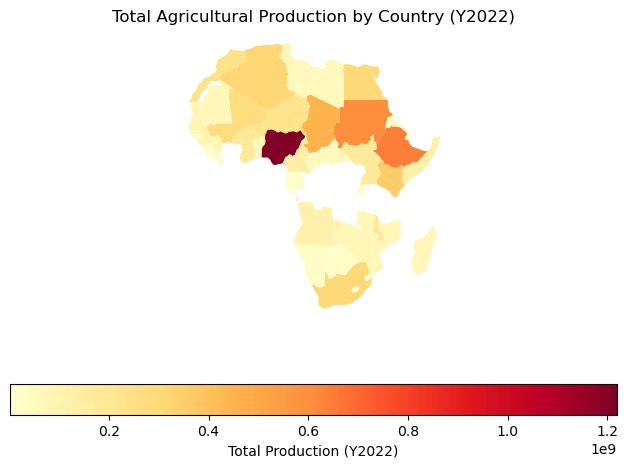

<Figure size 1500x800 with 0 Axes>

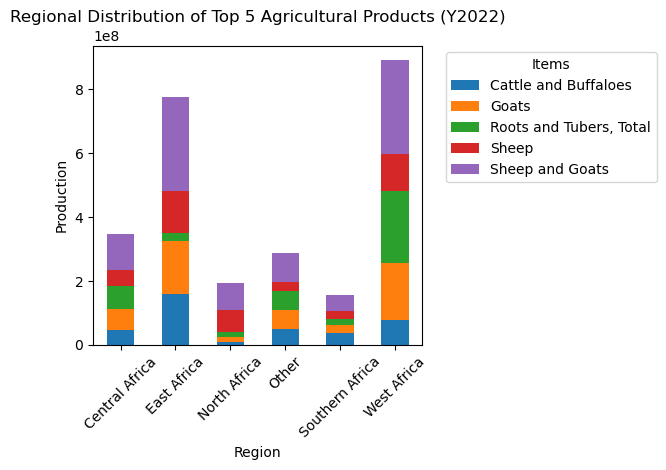

<Figure size 1500x1000 with 0 Axes>

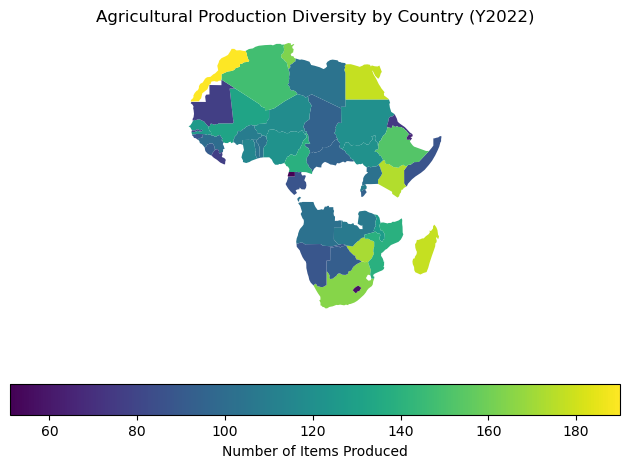

Created three geographical visualizations for Y2022:
1. Total Agricultural Production Choropleth Map
2. Regional Distribution of Top 5 Agricultural Products
3. Production Diversity Map (Number of different items produced per country)
Top 5 Countries by Production Diversity:
     ADMIN  item_diversity
   Morocco             190
Madagascar             178
     Egypt             178
     Kenya             174
  Zimbabwe             172


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

# Load the data
df = pd.read_csv('Production_Crops_Livestock_E_Africa.csv', encoding='ISO-8859-1')
world = gpd.read_file('ne_110m_admin_0_countries.shp')


# List of African countries to filter by
african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 
    'Central African Republic', 'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Côte d\'Ivoire', 
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 
    'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 
    'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 
    'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 
    'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

# Filter for African countries using the 'ADMIN' column
africa = world[world['ADMIN'].isin(african_countries)]

# Get the most recent year
recent_year = df.filter(regex='^Y\\d{4}$').columns[-1]

# 1. Choropleth map of total agricultural production by country
total_production = df.groupby('Area')[recent_year].sum().reset_index()
total_production.columns = ['country', 'total_production']

# Merge with geographic data
africa_merged = africa.merge(total_production, how='left', left_on=['ADMIN'], right_on=['country'])

plt.figure(figsize=(15, 10))
africa_merged.plot(column='total_production', 
                  legend=True,
                  legend_kwds={'label': f'Total Production ({recent_year})',
                              'orientation': 'horizontal'},
                  missing_kwds={'color': 'lightgrey'},
                  cmap='YlOrRd')
plt.title(f'Total Agricultural Production by Country ({recent_year})')
plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Regional Production Distribution
# Create regions based on geographical location
east_africa = ['Ethiopia', 'Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi', 'Somalia', 'South Sudan', 'Sudan']
west_africa = ['Nigeria', 'Ghana', 'Senegal', 'Mali', 'Burkina Faso', 'Niger', 'Côte d\'Ivoire', 'Guinea', 'Sierra Leone']
north_africa = ['Egypt', 'Morocco', 'Algeria', 'Tunisia', 'Libya']
southern_africa = ['South Africa', 'Namibia', 'Botswana', 'Zimbabwe', 'Zambia', 'Mozambique', 'Madagascar']
central_africa = ['Cameroon', 'Chad', 'Central African Republic', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Gabon']

df['Region'] = df['Area'].apply(lambda x: 'East Africa' if x in east_africa else
                                        'West Africa' if x in west_africa else
                                        'North Africa' if x in north_africa else
                                        'Southern Africa' if x in southern_africa else
                                        'Central Africa' if x in central_africa else
                                        'Other')

# Calculate regional production for top 5 items
top_5_items = df.groupby('Item')[recent_year].sum().nlargest(5).index
regional_production = df[df['Item'].isin(top_5_items)].groupby(['Region', 'Item'])[recent_year].sum().unstack()

plt.figure(figsize=(15, 8))
regional_production.plot(kind='bar', stacked=True)
plt.title(f'Regional Distribution of Top 5 Agricultural Products ({recent_year})')
plt.xlabel('Region')
plt.ylabel('Production')
plt.legend(title='Items', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Production Diversity Map (Number of different items produced per country)
production_diversity = df.groupby('Area').agg({
    'Item': 'nunique',
    recent_year: 'sum'
}).reset_index()
production_diversity.columns = ['country', 'item_diversity', 'total_production']

# Merge with geographic data
africa_merged_diversity = africa.merge(production_diversity, how='left', 
                                     left_on=['ADMIN'], right_on=['country'])

plt.figure(figsize=(15, 10))
africa_merged_diversity.plot(column='item_diversity',
                           legend=True,
                           legend_kwds={'label': 'Number of Items Produced',
                                      'orientation': 'horizontal'},
                           missing_kwds={'color': 'lightgrey'},
                           cmap='viridis')
plt.title(f'Agricultural Production Diversity by Country ({recent_year})')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\
Created three geographical visualizations for {recent_year}:")
print("1. Total Agricultural Production Choropleth Map")
print("2. Regional Distribution of Top 5 Agricultural Products")
print("3. Production Diversity Map (Number of different items produced per country)")

# Display top 5 countries by production diversity
top_diversity = africa_merged_diversity.nlargest(5, 'item_diversity')[['ADMIN', 'item_diversity']]
print("\
Top 5 Countries by Production Diversity:")
print(top_diversity[['ADMIN', 'item_diversity']].to_string(index=False))

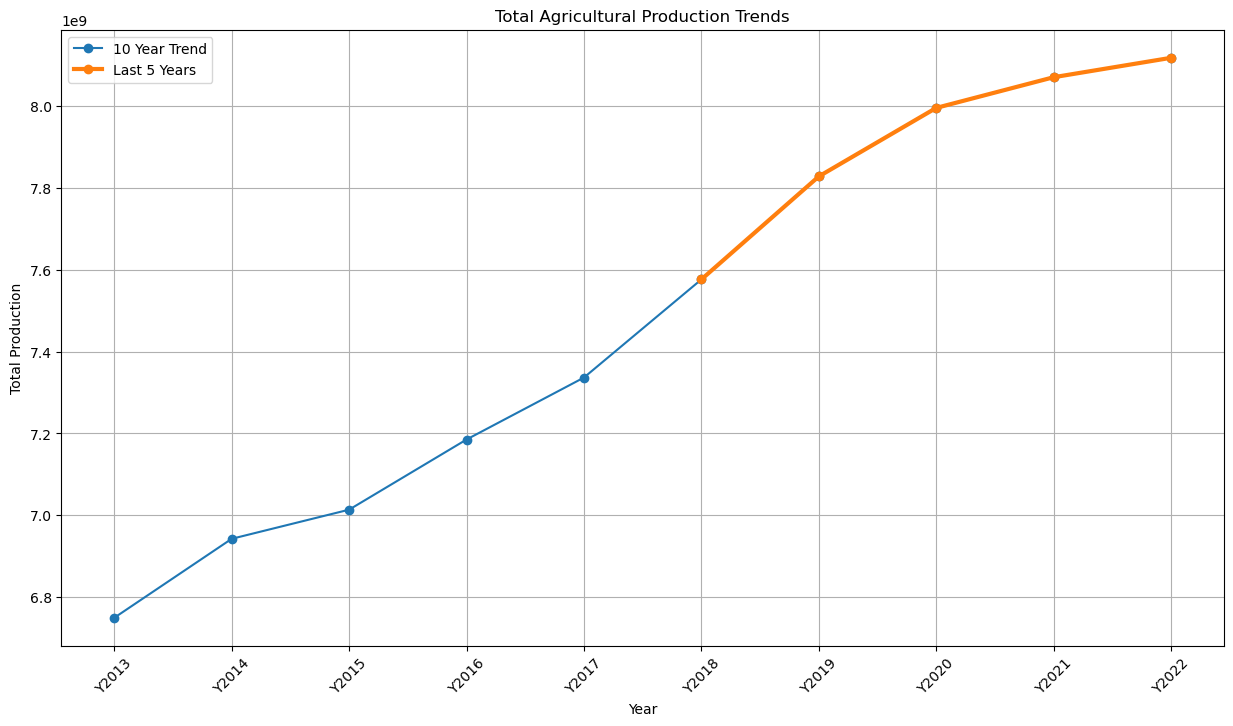

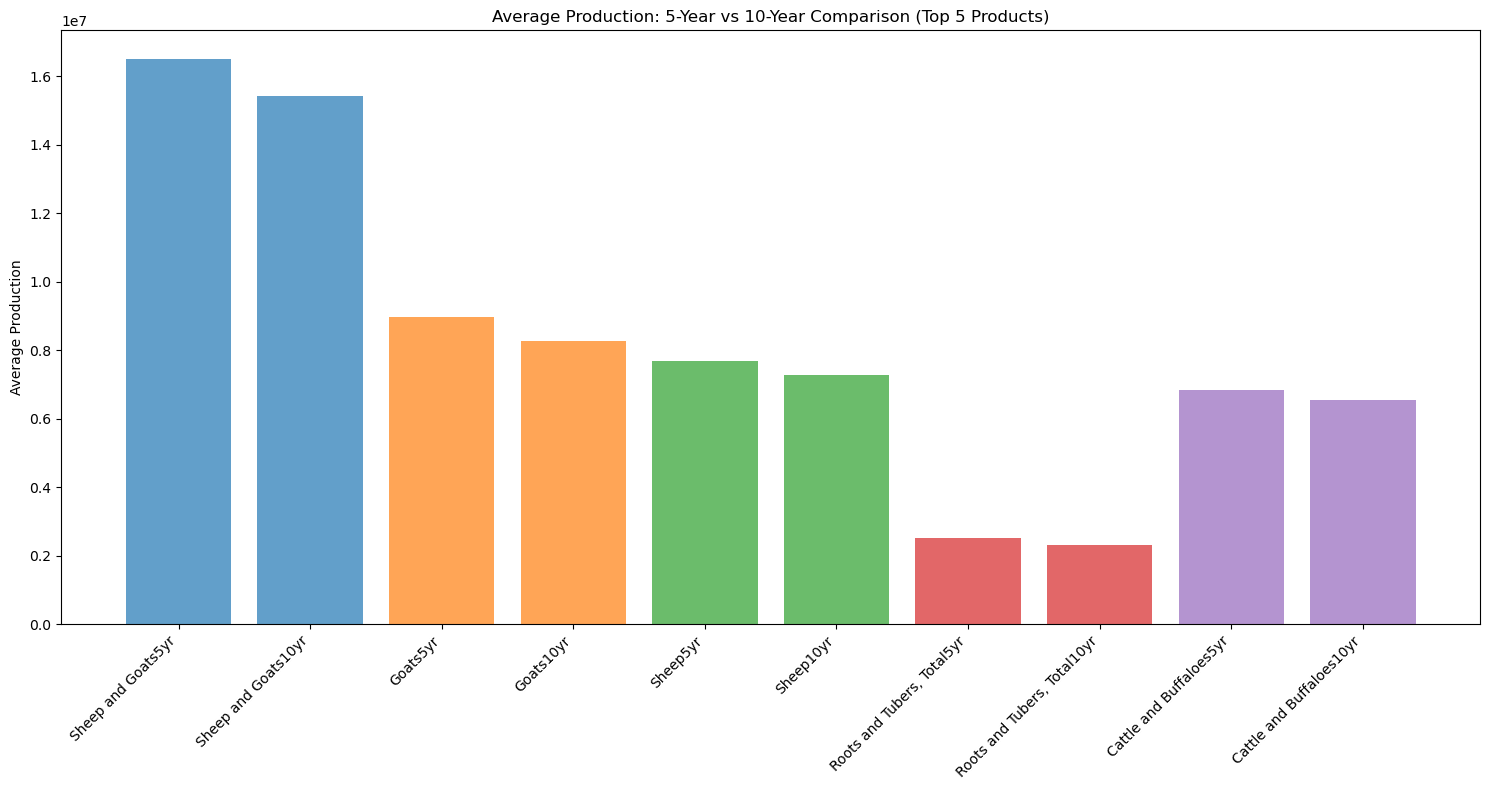

C:\Users\danog\AppData\Local\Temp\ipykernel_11428\2592130769.py:58: RuntimeWarning: invalid value encountered in scalar divide
  return ((end_year - start_year) / start_year) * 100


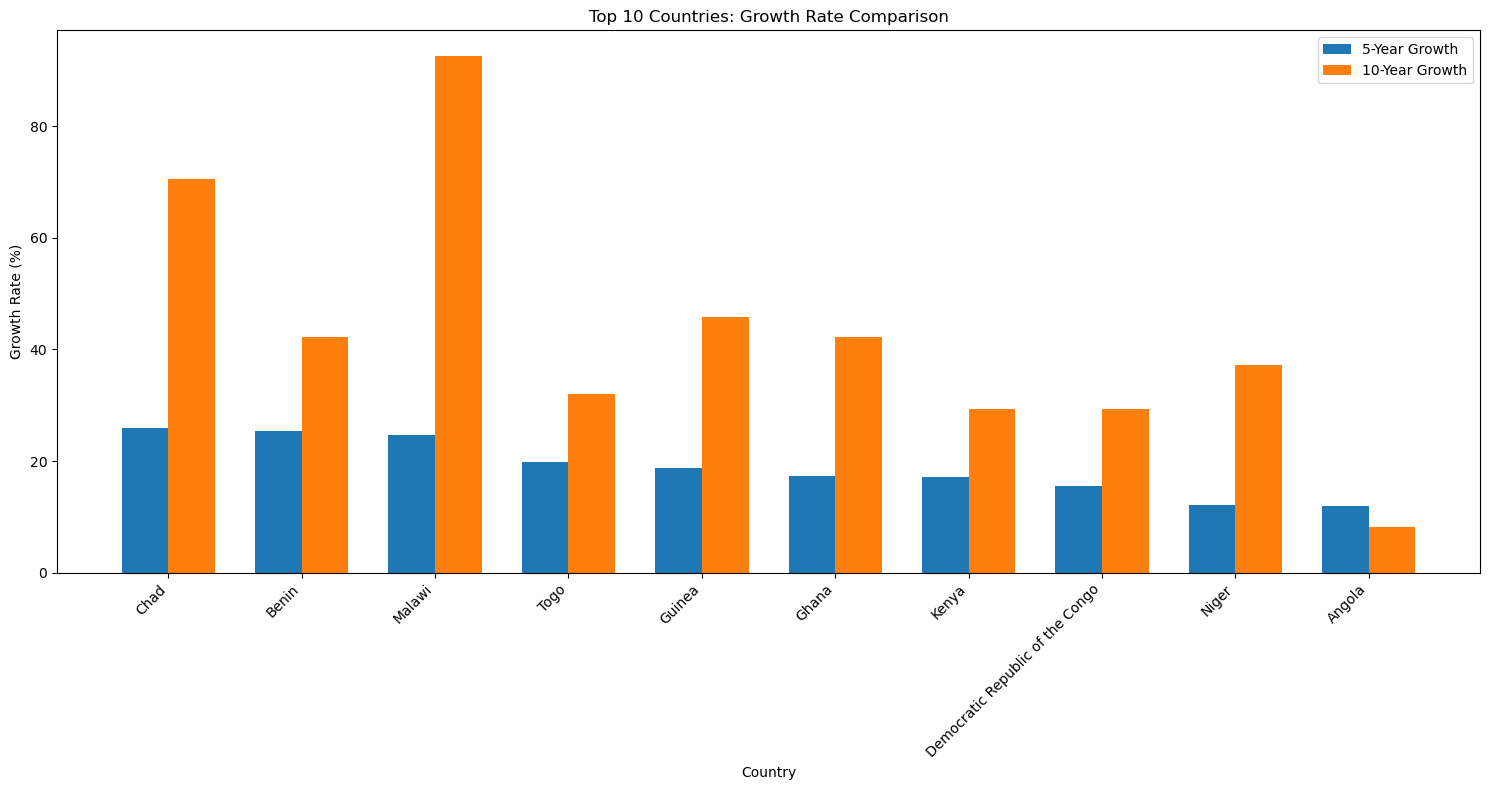

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('Production_Crops_Livestock_E_Africa.csv', encoding='latin1')

# Get year columns and convert to numeric
year_cols = [col for col in df.columns if col.startswith('Y') and not col.endswith('F') and not col.endswith('N')]
for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

year_cols.sort()  # Sort chronologically
last_5_years = year_cols[-5:]
last_10_years = year_cols[-10:]

# 1. Total Production Trends
plt.figure(figsize=(15, 8))
total_prod_5 = df[last_5_years].sum()
total_prod_10 = df[last_10_years].sum()

plt.plot(last_10_years, total_prod_10, marker='o', label='10 Year Trend')
plt.plot(last_5_years, total_prod_5, marker='o', linewidth=3, label='Last 5 Years')

plt.title('Total Agricultural Production Trends')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 2. Top 5 Products Comparison
top_5_items = df.groupby('Item')[year_cols[-1]].sum().nlargest(5).index

plt.figure(figsize=(15, 8))
for item in top_5_items:
    item_data = df[df['Item'] == item]
    avg_5yr = item_data[last_5_years].mean(axis=1).mean()
    avg_10yr = item_data[last_10_years].mean(axis=1).mean()
    plt.bar([f"{item}\
5yr", f"{item}\
10yr"], 
            [avg_5yr, avg_10yr],
            alpha=0.7)

plt.title('Average Production: 5-Year vs 10-Year Comparison (Top 5 Products)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Production')
plt.tight_layout()
plt.show()

# 3. Growth Rate Comparison
def calculate_growth(data, years):
    start_year = data[years[0]].sum()
    end_year = data[years[-1]].sum()
    return ((end_year - start_year) / start_year) * 100

# Calculate growth rates by country
countries_growth = []
for country in df['Area'].unique():
    country_data = df[df['Area'] == country]
    growth_5yr = calculate_growth(country_data, last_5_years)
    growth_10yr = calculate_growth(country_data, last_10_years)
    countries_growth.append({
        'Country': country,
        '5yr_growth': growth_5yr,
        '10yr_growth': growth_10yr
    })

growth_df = pd.DataFrame(countries_growth)
growth_df = growth_df.sort_values('5yr_growth', ascending=False).head(10)

plt.figure(figsize=(15, 8))
x = np.arange(len(growth_df))
width = 0.35

plt.bar(x - width/2, growth_df['5yr_growth'], width, label='5-Year Growth')
plt.bar(x + width/2, growth_df['10yr_growth'], width, label='10-Year Growth')

plt.title('Top 10 Countries: Growth Rate Comparison')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(x, growth_df['Country'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()